In [62]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import ast
import json 
import ndjson
import os
import random

In [63]:
def load_movies(name):
    df = pd.read_csv(name)
    df['keywords'] = df['keywords'].apply(json.loads)
    return df


def edit_names(keywords):
    return','.join([x['name'] for x in keywords])


def get_category_from_filename(filename):
    i = filename.rfind('_')
    filename = filename[i+1:-7]
    return filename


movies = load_movies('MoviesList.csv')
tmdb_movies = movies.copy()
tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(edit_names)


df_categories = pd.read_csv('Categories_List.csv')
categories = df_categories['Categories']
categories_set = set()
categories_new_set = set()


for obj in tmdb_movies['keywords']:
    list = obj.split(',')
    categories_set.update(list)
    
    
for value in categories_set:
    if categories.eq(value).any():  # exact match string
#         print(value)
        categories_new_set.add(value)
        
category_count = len(categories_new_set)
print("Total categories= ", len(categories_new_set))


import csv

movies_df = load_movies('MoviesList.csv') #dataframe
categories_list = categories.tolist()

with open('MoviesListEdited.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(['Name', 'Keywords'])
    for index, row in movies_df.iterrows():
        name = row["original_title"]
        keywords_list = [ sub['name'] for sub in row["keywords"] ] 
        new_list = set(keywords_list) & set(categories_list)
        filewriter.writerow([name, new_list])
        
        
doodle_dict = dict()
doodles_df = pd.DataFrame()
path = './Doodle_ndjson'

Total categories=  15


In [64]:
for file in os.listdir(path):
    data_new = []
    data = []

    filename = get_category_from_filename(file)
    print("Reading file "+filename+".......")

    #going through all the files in Doodle_ndjson directory
    with open(path+"/"+file) as f:
        data = ndjson.load(f)  # loads an ndjson as list of doodle data # data[listitem] is <class 'dict'>
        for listitem in range(len(data)):
            # ignoring the items if 'recognized' is False
            if data[listitem]['recognized'] != False:
                data_new.append(data[listitem].get('drawing'))

    # Randomly selecting 100 items from a doodle data list
    data = random.sample(data_new, 25)
    # adding each data list to dictionary <key = category_name> <value = data>
    doodle_dict[filename] = data

print('Done!')

Reading file cruise ship.......
Reading file dragon.......
Reading file giraffe.......
Reading file hammer.......
Reading file lion.......
Reading file monkey.......
Reading file ocean.......
Reading file panda.......
Reading file penguin.......
Reading file shark.......
Reading file snake.......
Reading file spider.......
Reading file tiger.......
Reading file whale.......
Reading file zebra.......
Done!


In [65]:
doodle_df = pd.DataFrame(doodle_dict)

In [66]:
doodle_df.head(1)

,cruise ship,dragon,giraffe,hammer,lion,monkey,ocean,panda,penguin,shark,snake,spider,tiger,whale,zebra
0,"[[[215, 169, 70, 3, 0, 5, 38, 82, 112, 156, 21...","[[[38, 15, 1, 8, 20, 46, 33, 16, 19, 30, 43, 5...","[[[86, 79, 61, 33, 1, 32, 49], [74, 72, 36, 0,...","[[[53, 53, 47, 47, 52, 61, 87, 83, 83, 75, 75,...","[[[111, 100, 86, 83, 84, 108, 151], [96, 109, ...","[[[97, 98, 105, 134, 148, 162, 173], [47, 38, ...","[[[0, 40, 77, 93, 117, 132, 189, 202, 223, 247...","[[[79, 58, 49, 30, 22, 14, 15, 18, 32, 53, 78,...","[[[141, 177, 147, 133, 104, 94, 81, 71, 33, 5,...","[[[150, 147, 106, 74, 27, 4, 0, 10, 49, 103, 1...","[[[55, 35, 8, 2, 7, 60, 91, 100, 104, 107, 106...","[[[144, 129, 121, 115, 117, 123, 138, 158, 171...","[[[2, 2, 14, 88, 103, 134, 189, 203, 215], [60...","[[[115, 71, 40, 11, 4, 0, 4, 21, 50, 101, 129,...","[[[44, 33, 21, 15, 17, 0, 1, 20, 47, 50, 50, 3..."


In [67]:
doodle_df.columns = ["cruise_ship", "dragon", "giraffe", "hammer", "lion",
                     "monkey", "ocean", "panda", "penguin", "shark", 
                     "snake", "spider", "tiger", "whale", "zebra"]

In [68]:
pic = doodle_df.loc[0][0]
doodle_df.shape

(25, 15)

In [69]:
def delete_files(files):
    file_dir = "C:/Users/Hermi/Desktop/Machine_Learning/guessTheMovie-master/guessTheMovie-master/Generated_Doodles/te/"
    
    folder = file_dir 
#     + files
    
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

In [71]:
def delete_df_generated_pictures_in_directory(df):
    columns = df.shape[1]
    all_columns = df.columns

    for j in range(columns):
        column_name = all_columns[j]
        delete_files(column_name)
    

In [72]:
def draw_everything(df):
    
    # delete_df_generated_pictures_in_directory(df)
    
    rows = df.shape[0]
    columns = df.shape[1]

    all_columns = df.columns
    
    for j in range(columns):
        
        column_name = all_columns[j]
        
        for i in range(rows):
            
            pic = df.iloc[i][j]
            
            plt.figure(figsize = (23, 23))
            
            file_dir = "C:/Users/Hermi/Desktop/Machine_Learning/guessTheMovie-master/guessTheMovie-master/Generated_Doodles/test/"

            for k in range(len(pic)):

                y = np.array(pic[k][1])*-1

                plt.plot(pic[k][0], y, linewidth = 10, color = "blue")
                plt.axis('off')
                
            file_name = file_dir + column_name + '/' + column_name + '_' + str(i + 35) + ".jpg"
            plt.savefig(file_name)
            plt.close()

In [55]:
# delete_df_generated_pictures_in_directory(doodle_df)

In [73]:
draw_everything(doodle_df)

In [24]:
fname = "Generated_Doodles/validation/cruise_ship/cruise_ship_33.jpg"
img = plt.imread(fname)

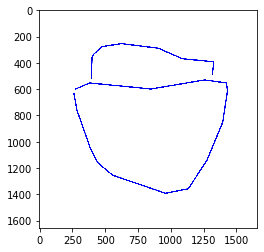

In [25]:
plt.imshow(img)